In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_contours(mu, sigma, title, max_x, min_x, max_y, min_y):
    x = np.linspace(min_x, max_x, 100)
    y = np.linspace(min_y, max_y, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            diff = pos[i, j] - mu
            exponent = -0.5 * np.dot(np.dot(diff, np.linalg.inv(sigma)), diff.T)
            Z[i, j] = np.exp(exponent) / (2 * np.pi * np.sqrt(np.linalg.det(sigma)))

    return X, Y, Z

Мы рассматриваем N-мерное нормальное распределение вида:
$$ N(x, μ, Σ) = \frac{1}{\sqrt{(2 π)^n |Σ|}} e^{-\frac{1}{2} (x-μ)^T Σ^{-1} (x-\mu)} $$

Если признаки не коррелируют, тогда матрица $Σ$ будет диагональной. Если положить, что признаки имеют одинаковую дисперсию, мы получим окружности, с центроим в точке $μ$. Матрица будет иметь вид $Σ = σ^2E$

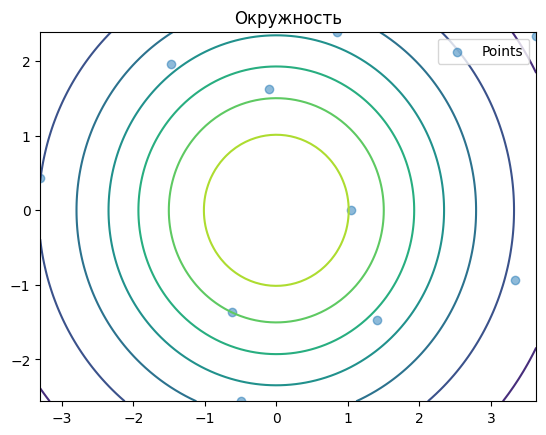

In [ ]:
mu = np.array([0, 0])
cov = np.array([[4, 0], [0, 4]])

num_samples = 10
points = np.random.multivariate_normal(mu, cov, num_samples)

X, Y, Z = plot_contours(mu, cov, 'Окружность', max(points[:, 0]), min(points[:, 0]), max(points[:, 1]), min(points[:, 1]))
plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label='Points')
plt.contour(X, Y, Z)
plt.title('Окружность')
plt.legend()
plt.show()

Если положить дисперсию у признаков разную, но при этом оставить условие некореллированности, то получим эллипсоиды с центром $\mu$, будут параллельны осям и расстянуты соотвественно значениям в ковариационной матрице.

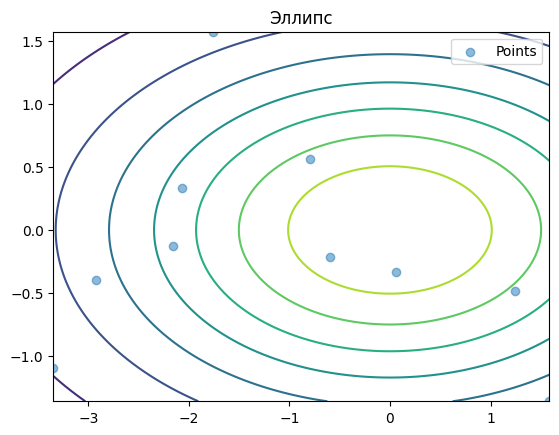

In [ ]:
mu = np.array([0, 0])
cov = np.array([[4, 0], [0, 1]])

num_samples = 10
points = np.random.multivariate_normal(mu, cov, num_samples)

X, Y, Z = plot_contours(mu, cov, 'Эллипс', max(points[:, 0]), min(points[:, 0]), max(points[:, 1]), min(points[:, 1]))
plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label='Points')
plt.contour(X, Y, Z)
plt.title('Эллипс')
plt.legend()
plt.show()

Пусть признаки коррелируют. Тогда матрица ковариации не диагональна, а линии уровня это эллипсоиды, которые наклонены относительно осей координат.

<ipython-input-29-266caecb4aa2>:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  points = np.random.multivariate_normal(mu, cov, num_samples)


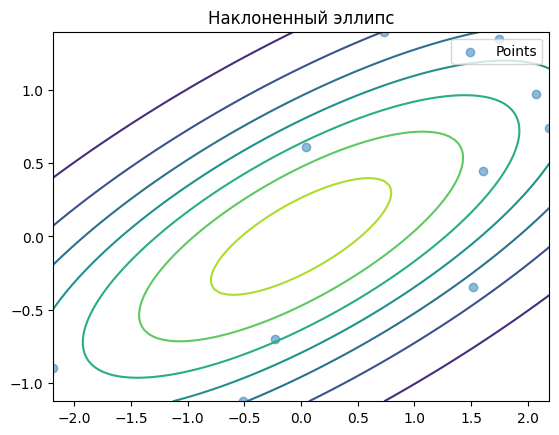

In [ ]:
mu = np.array([0, 0])
cov = np.array([[4, 2], [1, 1]])

num_samples = 10
points = np.random.multivariate_normal(mu, cov, num_samples)

X, Y, Z = plot_contours(mu, cov, 'Эллипс', max(points[:, 0]), min(points[:, 0]), max(points[:, 1]), min(points[:, 1]))
plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label='Points')
plt.contour(X, Y, Z)
plt.title('Наклоненный эллипс')
plt.legend()
plt.show()